<h1 align="center"> Logistic Regression Classifier</h1>
<br></br><br></br>

In functional approaches to data classification, such as logistic
regression, the goal is to find a **hypothetical function** h(x) which can best describe the correlation between variables x and y.

<img src="LRC.png" style="width: 50%;" align ="center" />

If the input data is 2D, the function is a **curve** which fits through the data points. In 3D the function represents a **plane** and in higher
dimensions a **hyperplane**.

The mathematical function used in Logistic Regression is known as
a **sigmoid** (aka logistic). The output of the function is **between 0
and 1** for all input values. 

$$f(x) = \frac{1}{1+e^{-x}}$$

**Code Example:**

d:\programs\python\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


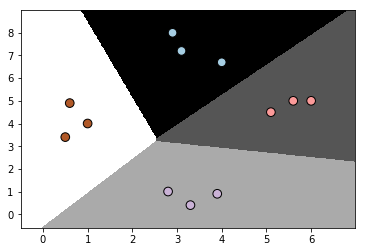

In [2]:
import numpy as np
import matplotlib.pyplot as plt    
from sklearn import linear_model


'''=====================Visualzation Function========================''' 
def visualize_classifier(classifier, x,y):
    # Define the min and max values for x and y
    # that will be used in the mesh grid
    min_x = x[:,0].min()-1.0 # show the first col of x's min value-1
    max_x = x[:,0].max()+1.0 # show the first col of x's max value+1
    min_y = x[:,1].min()-1.0 # show the second col of x's min value-1
    max_y = x[:,1].max()+1.0 # show the second col of x's max value+1
    
    # Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of x and y values
    x_vals,y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), 
                                np.arange(min_y, max_y, mesh_step_size))
    
    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    
    # Overlay the training points on the plot
    plt.scatter(x[:, 0], x[:, 1], c=y, s=75, edgecolors='black', 
                linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(x[:, 0].min() - 1), 
                          int(x[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(x[:, 1].min() - 1), 
                          int(x[:, 1].max() + 1), 1.0)))
    
    #plt.show() # only don't call in jupyter 
    
'''=============================Main=================================''' 


# Define sample input data
x = np.array([[3.1, 7.2],
              [4, 6.7],
              [2.9, 8],
              [5.1, 4.5],
              [6, 5],
              [5.6, 5],
              [3.3, 0.4],
              [3.9, 0.9],
              [2.8, 1],
              [0.5, 3.4],
              [1, 4],
              [0.6, 4.9]])

y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Create the logistic regression classifier

#classifier = linear_model.LogisticRegression(solver='liblinear', C=1)
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

# Train the classifier
classifier.fit(x, y)

# Visualize the performance of the classifier
visualize_classifier(classifier, x, y)